# Pandas

## About Pandas
Pandas is a powerful and versatile Python library primarily used for data manipulation, analysis, and cleaning. It is particularly well-suited for working with structured and tabular data, making it a valuable tool for a wide range of data-related problems. Here are some common problems that can be solved using Pandas:

**Data Cleaning and Preprocessing:**
  - Handling missing values: Pandas provides methods to identify, fill, or drop missing data.
  - Data transformation: Reformatting data, converting data types, and handling outliers.
  - Removing duplicates: Identifying and removing duplicate rows from datasets.
  - Data normalization and scaling: Standardizing data for consistent analysis.

**Data Analysis and Exploration:**
  - Descriptive statistics: Calculating mean, median, mode, variance, and other summary statistics.
  - Grouping and aggregation: Grouping data by specific attributes and applying aggregate functions.
  - Pivot tables: Creating summary tables for cross-tabulation and analysis.
  - Time series analysis: Handling date and time data, resampling, and analyzing trends.

**Data Visualization:**
  - Plotting and charting: Creating various types of graphs, such as line plots, bar plots, and histograms.
  - Exploratory data visualization: Visualizing relationships and patterns in the data.

**Data Transformation and Manipulation:**
  - Merging and joining: Combining datasets based on common keys or indices.
  - Filtering and subsetting: Selecting specific rows or columns based on conditions.
  - Applying functions: Applying custom functions to rows, columns, or elements of the data.

**Data Input and Output:**
  - Reading and writing data: Loading data from various file formats (CSV, Excel, SQL databases) and saving processed data.

**Time Series Analysis:**
  - Handling time-indexed data: Resampling, shifting, and rolling calculations for time series data.
  - Moving averages: Calculating rolling averages and other time-based statistics.

**Statistical Analysis and Modeling:**
  - Hypothesis testing: Conducting t-tests, ANOVA, and other statistical tests.
  - Correlation and regression analysis: Analyzing relationships between variables.
  - Feature engineering: Creating new features from existing data for machine learning.

**Data Wrangling for Machine Learning:**
  - Feature selection: Selecting relevant features for machine learning models.
  - Data transformation: Preparing data in the required format for machine learning algorithms.

These are just a few examples of the types of problems that Pandas can help solve. Its flexibility and ease of use make it an essential tool for data analysts, scientists, and engineers working with structured data.


### Installing Pandas
You can install Pandas using the following command:

In [1]:
# !pip install pandas

### What is a DataFrame, and what is a Series?
DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

First let us import required libraries (you may need to install other libraries!):

In [2]:
import pandas as pd                         # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from numpy.random import randn
np.random.seed(101)

In [4]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [5]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### Data Manipulation using Pandas: *Indexing, Slicing, Filtering and Combining*

In [6]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [7]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [8]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [9]:
# Dataframe columns are just series
type(df['W'])

pandas.core.series.Series

In [10]:
# Creating new column
df['new'] = df['W'] + df['Y']

In [11]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [12]:
# Removing a column
df.drop('new',axis=1)
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [13]:
# Why did the above not work?
# ... it worked, but a new copy of df was created by default ...

In [14]:
# However, if we want to drop a column without creating a copy, we can use "inplace" as shown below
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [15]:
# Can also drop rows
df.drop('E',axis=0, inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [16]:
# Selecting rows
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [17]:
# Or select based on the row position instead of label (Note: row numbering starts at '0')
# The following statement selects the third row
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [18]:
# Selecting subset of rows and columns
df.loc['B','Y']

-0.8480769834036315

In [19]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


**Questions:**
> *Answer the following questions in the cell(s) provided below. For theory questions, you can write your answer in the cell as a comment. You can add more cells also.*
1. How would you extract the first three rows of a DataFrame using indexing and slicing? Form a sample dataset and extract the first three rows of a DataFrame using indexing and slicing

In [20]:
### YOUR CODE HERE ###
df1=df.loc[['A','B','C']]
df1

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001


### Data Analysis using Pandas: *Merging, Grouping, Descriptive statistics, Data Visualization*
#### Merging
The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [21]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [22]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [23]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [24]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**Questions:**
> *Answer the following questions in the cell(s) provided below. For theory questions, you can write your answer in the cell as a comment. You can add more cells also.*
2. Merge the following:
```python
   left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

   right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})
```
3. Describe the differences between the `merge()` and `concat()` functions in Pandas when it comes to combining multiple DataFrames. Read about `concat()` function [here](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [25]:
### YOUR CODE HERE ###
# left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
#                         'key2': ['K0', 'K1', 'K0', 'K1'],
#                         'A': ['A0', 'A1', 'A2', 'A3'],
#                         'B': ['B0', 'B1', 'B2', 'B3']})

# right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
#                         'key2': ['K0', 'K0', 'K0', 'K0'],
#                         'C': ['C0', 'C1', 'C2', 'C3'],
#                         'D': ['D0', 'D1', 'D2', 'D3']})

# Concatenating along columns
# concat_columns = pd.concat([left, right], axis=1)
# print(concat_columns)
# concat_rows_reset = pd.concat([left, right], axis=0, ignore_index=True)
# print(concat_rows_reset)
# concat_with_keys = pd.concat([left, right], keys=['left', 'right'], axis=1)
# print(concat_with_keys)



#### Grouping
The `groupby` method allows you to group rows of data together and call aggregate functions

In [26]:
# Create dataframe
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'F', 'F', 'G', 'F', 'F', 'G', 'G'],
                   'points': [30, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [4, 3, 7, 7, 12, 15, 8, 4]})
print(df)

  team position  points  assists
0    A        G      30        4
1    A        F      22        3
2    A        F      19        7
3    A        G      14        7
4    B        F      14       12
5    B        F      11       15
6    B        G      20        8
7    B        G      28        4


In [27]:
by_team=df.groupby('team')

Now you can use the .`groupby()` method to group rows together based on a column name. For instance let's group based on Team. This will create a DataFrameGroupBy object:

#### Descriptive Statistics on grouped data

In [28]:
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'F', 'F', 'G', 'F', 'F', 'G', 'G'],
                   'points': [30, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [4, 3, 7, 7, 12, 15, 8, 4]})
print(df)
by_team=df.groupby('team')
print(by_team['points'].mean())

  team position  points  assists
0    A        G      30        4
1    A        F      22        3
2    A        F      19        7
3    A        G      14        7
4    B        F      14       12
5    B        F      11       15
6    B        G      20        8
7    B        G      28        4
team
A    21.25
B    18.25
Name: points, dtype: float64


In [29]:
df.groupby('team')['points'].mean()

team
A    21.25
B    18.25
Name: points, dtype: float64

In [30]:
by_team['points'].std()

team
A    6.70199
B    7.50000
Name: points, dtype: float64

In [31]:
by_team['points'].min()

team
A    14
B    11
Name: points, dtype: int64

In [32]:
by_team['points'].max()

team
A    30
B    28
Name: points, dtype: int64

In [33]:
by_team.count()

,position,points,assists
team,,,
A,4,4,4
B,4,4,4


In [34]:
by_team.describe()

points                                                assists        \
      count   mean      std   min    25%   50%   75%   max   count  mean   
team                                                                       
A       4.0  21.25  6.70199  14.0  17.75  20.5  24.0  30.0     4.0  5.25   
B       4.0  18.25  7.50000  11.0  13.25  17.0  22.0  28.0     4.0  9.75   

                                              
           std  min   25%   50%    75%   max  
team                                          
A     2.061553  3.0  3.75   5.5   7.00   7.0  
B     4.787136  4.0  7.00  10.0  12.75  15.0

**Questions:**
> *Answer the following questions in the cell(s) provided below. For theory questions, you can write your answer in the cell as a comment. You can add more cells also.*
4. For the DataFrame named sales_data given below containing information about sales transactions, including columns "product", "category", and "sales_amount", write a code snippet to group the data by "category" and calculate the total sales amount for each category.
```python
   data = {'product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
           'category': ['X', 'Y', 'X', 'Z', 'Y', 'Z', 'X', 'Y'],
           'sales_amount': [100, 150, 120, 80, 200, 90, 110, 180]}

   sales_data = pd.DataFrame(data)
   sales_data
```

5. For the DataFrame named employee_data given below which contains employee information including "department", "salary", and "gender", write a code snippet to group the data by "department" and calculate both the average salary and the maximum salary for each department.
```python
   data = {'department': ['HR', 'Engineering', 'Engineering', 'HR', 'Finance', 'Finance', 'Engineering', 'HR'],
           'salary': [60000, 75000, 80000, 65000, 70000, 72000, 77000, 62000],
           'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']}

   employee_data = pd.DataFrame(data)
   employee_data
```

In [35]:
### YOUR CODE HERE ###
data = {'product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
           'category': ['X', 'Y', 'X', 'Z', 'Y', 'Z', 'X', 'Y'],
           'sales_amount': [100, 150, 120, 80, 200, 90, 110, 180]}

sales_data = pd.DataFrame(data)
by_cat=sales_data.groupby('category')
print(by_cat['sales_amount'].sum())

data = {'department': ['HR', 'Engineering', 'Engineering', 'HR', 'Finance', 'Finance', 'Engineering', 'HR'],
           'salary': [60000, 75000, 80000, 65000, 70000, 72000, 77000, 62000],
           'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']}
employee_data = pd.DataFrame(data)
by_dept=employee_data.groupby('department')
print(by_dept['salary'].mean(),by_dept['salary'].max())

category
X    330
Y    530
Z    170
Name: sales_amount, dtype: int64
department
Engineering    77333.333333
Finance        71000.000000
HR             62333.333333
Name: salary, dtype: float64 department
Engineering    80000
Finance        72000
HR             65000
Name: salary, dtype: int64


### Data Visualization using Pandas

#### Line Plot

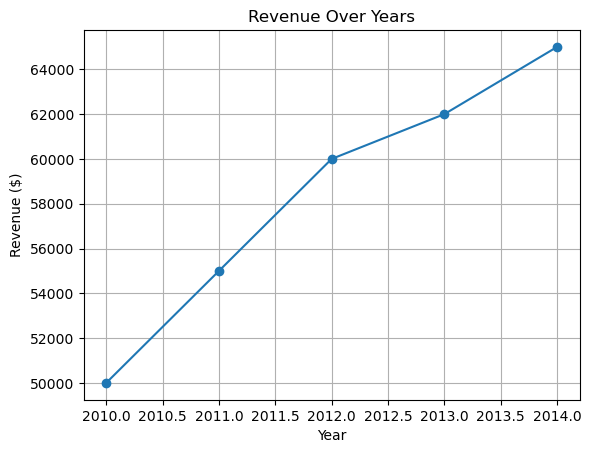

In [36]:
# Create a DataFrame
data = {'Year': [2010, 2011, 2012, 2013, 2014],
        'Revenue': [50000, 55000, 60000, 62000, 65000]}

df = pd.DataFrame(data)

# Create a line plot
plt.plot(df['Year'], df['Revenue'], marker='o')
plt.title('Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

**Questions:**
> *Answer the following questions in the cell(s) provided below. For theory questions, you can write your answer in the cell as a comment. You can add more cells also.*
6. Explain how do line plots help in understanding relationships between variables? Describe a scenario where pair-wise plots might not be the most suitable visualization technique, and suggest an alternative method.


In [37]:
### YOUR CODE HERE ###

#### Bar Plot

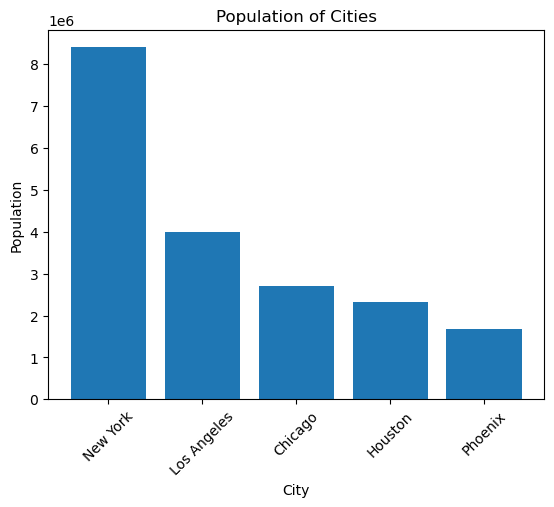

In [38]:
# Create a DataFrame
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
        'Population': [8398748, 3990456, 2716000, 2320268, 1680992]}

df = pd.DataFrame(data)

# Create a bar plot
plt.bar(df['City'], df['Population'])
plt.title('Population of Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

#### Histogram

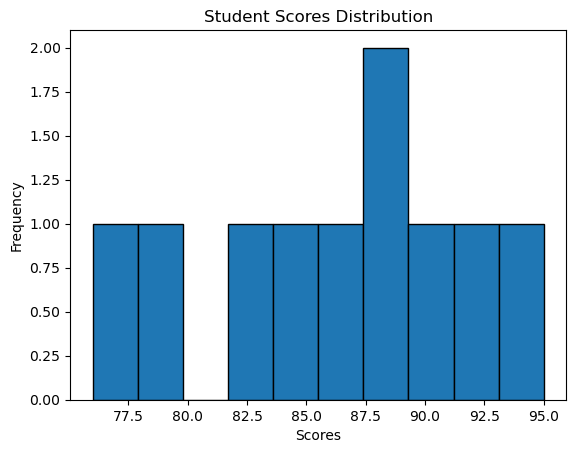

In [39]:
# Create a DataFrame
data = {'Scores': [85, 92, 78, 95, 88, 76, 89, 91, 83, 87]}

df = pd.DataFrame(data)

# Create a histogram
plt.hist(df['Scores'], bins=10, edgecolor='black')
plt.title('Student Scores Distribution')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

#### Scatter Plot

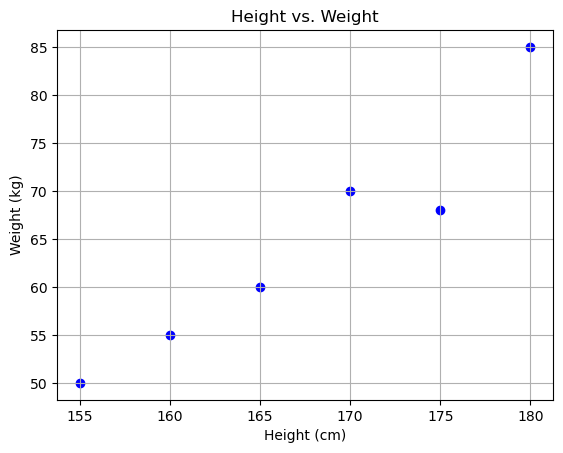

In [40]:
# Create a DataFrame
data = {'Height': [165, 170, 155, 180, 160, 175],
        'Weight': [60, 70, 50, 85, 55, 68]}

df = pd.DataFrame(data)

# Create a scatter plot
plt.scatter(df['Height'], df['Weight'], color='blue')
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

### Box Plot
- Read about Box Plot [here](https://builtin.com/data-science/boxplot)

/tmp/ipykernel_4925/1654813685.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Category'] == 'A']['Value'],


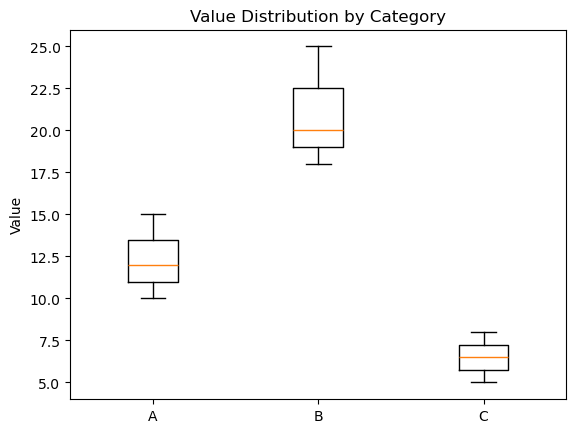

In [41]:
# Create a DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
        'Value': [10, 20, 15, 5, 25, 8, 12, 18]}

df = pd.DataFrame(data)

# Create a box plot
plt.boxplot([df[df['Category'] == 'A']['Value'],
             df[df['Category'] == 'B']['Value'],
             df[df['Category'] == 'C']['Value']],
            labels=['A', 'B', 'C'])
plt.title('Value Distribution by Category')
plt.ylabel('Value')
plt.show()

**Questions:**
> *Answer the following questions in the cell(s) provided below. For theory questions, you can write your answer in the cell as a comment. You can add more cells also.*

7. On the dataset given below do the following:
   - Create a line plot to visualize the trend of math scores over the five students.
   - Generate a bar plot that shows the average reading scores for each student.
   - Create a histogram to visualize the distribution of ages among the students.
   - Produce a scatter plot to explore the relationship between math and science scores.
   - Design a box plot to visualize the spread of reading scores across students.
   - Create a pie chart to represent the proportion of students within different age groups (e.g., 18-19, 20-21). (read about pie chart [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html))
   - Generate a heatmap to show the correlation between different subjects' scores.
```python
   data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
           'Age': [18, 20, 19, 21, 18],
           'Math Score': [85, 92, 78, 95, 88],
           'Reading Score': [90, 88, 75, 82, 95],
           'Science Score': [92, 87, 80, 89, 78]}
   student_df = pd.DataFrame(data)
   student_df
```

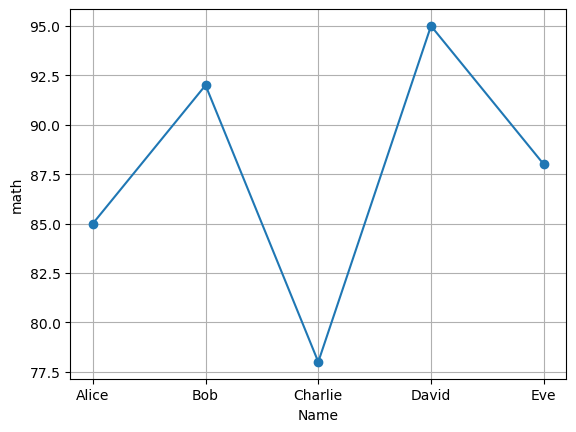

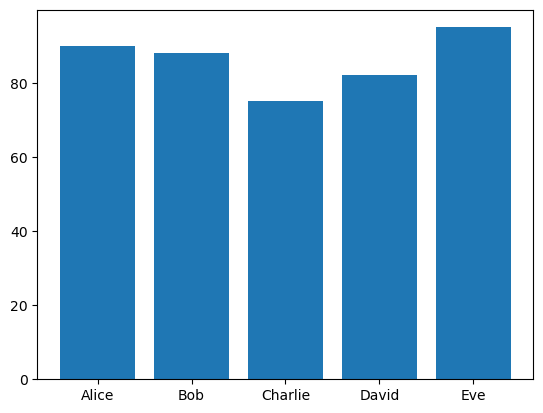

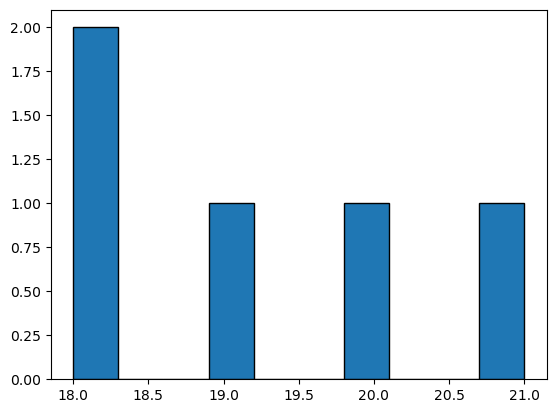

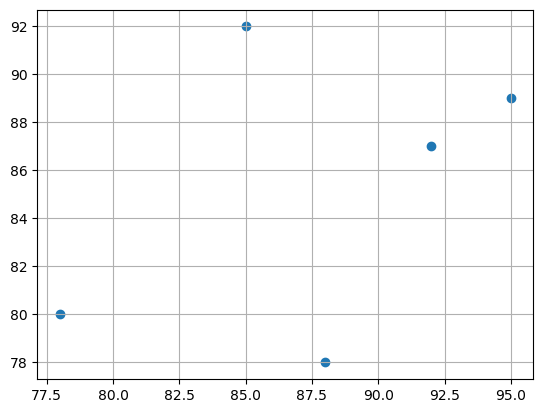

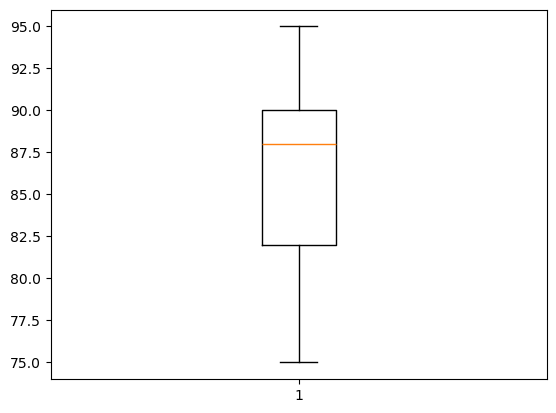

Text(0.5, 1.0, 'Heatmap of Marks in subjects wrt student')

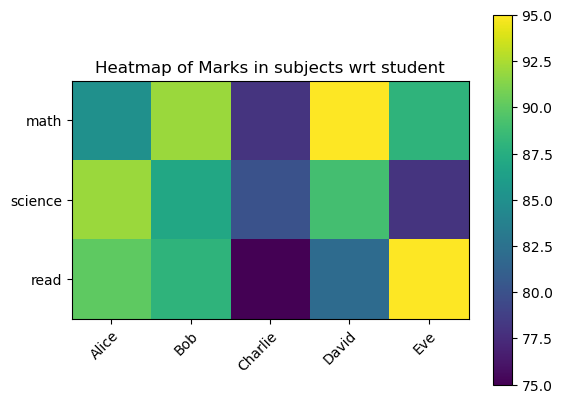

In [42]:
### YOUR CODE HERE ###
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
           'Age': [18, 20, 19, 21, 18],
           'Math Score': [85, 92, 78, 95, 88],
           'Reading Score': [90, 88, 75, 82, 95],
           'Science Score': [92, 87, 80, 89, 78]}
student_df = pd.DataFrame(data)
plt.plot(student_df['Name'],student_df['Math Score'],marker='o')
plt.xlabel('Name')
plt.ylabel('math')
plt.grid(True)
plt.show()
plt.bar(student_df['Name'],student_df['Reading Score'])
plt.show()
plt.hist(student_df['Age'],bins=10,edgecolor='black')
plt.show()
plt.scatter(student_df['Math Score'],student_df['Science Score'])
plt.grid(True)
plt.show()
plt.boxplot(student_df['Reading Score'])
plt.show()
v=np.array(pd.DataFrame(student_df['Math Score']))
u=np.array(pd.DataFrame(student_df['Science Score']))
w=np.array(pd.DataFrame(student_df['Reading Score']))
t=np.concatenate((v,u,w),axis=1).T
fig, ax = plt.subplots()
im = ax.imshow(t) # heatmap
# Show all ticks and label them with the respective list entries
ax.set_xticks((np.arange(5)), labels=student_df['Name'])
ax.set_yticks((np.arange(3)), labels=['math','science','read'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.colorbar(im)
ax.set_title("Heatmap of Marks in subjects wrt student")

### Pair Wise Plots

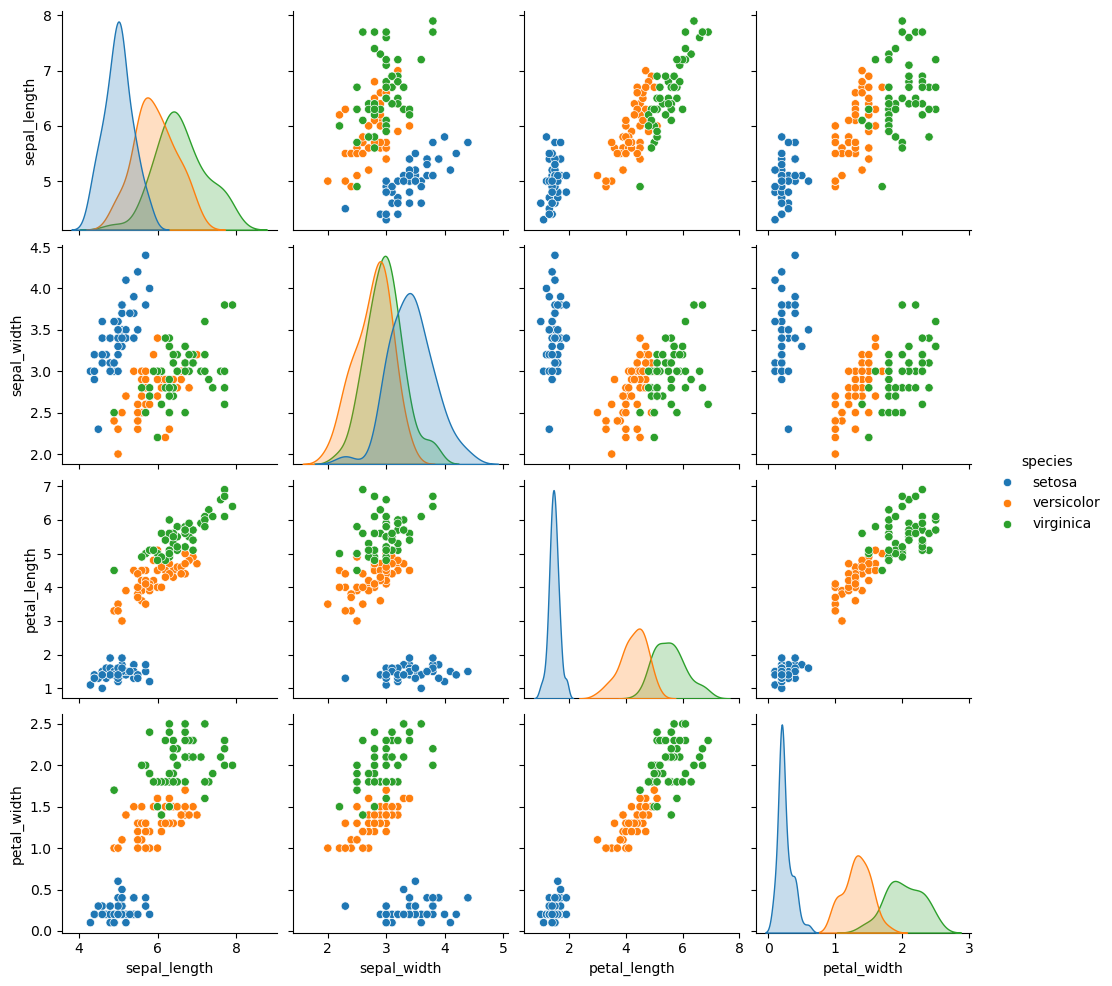

In [43]:
# Load a dataset
iris = sns.load_dataset('iris')

# Create pair-wise plots
sns.pairplot(iris, hue='species')
plt.show()

Read more about Data visualization using pandas [here](https://pandas.pydata.org/docs/user_guide/visualization.html)

### Correlation Analysis

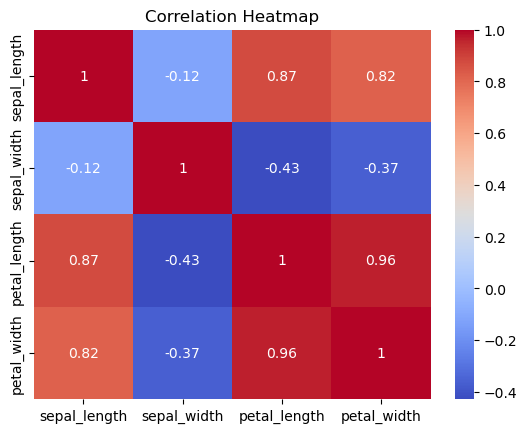

In [44]:
# Load a dataset
iris = sns.load_dataset('iris')

# Calculate correlation matrix
correlation_matrix = iris.corr(numeric_only=True)

# Create a heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load a dataset
iris = sns.load_dataset('iris')

# Separate features and target
X = iris.drop('species', axis=1)
y = iris['species']

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

print('Selected Features:', selected_features)

Selected Features: Index(['petal_length', 'petal_width'], dtype='object')


The technique used here is SelectKBest. Read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

To read more ways of Feature Selection refer [here](https://scikit-learn.org/stable/modules/feature_selection.html)

### Data Cleaning

In [46]:
# Sample data with missing values
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', "Alice"],
        'Age': [25, None, 30, 28, 22, 25],
        'Salary': [50000, 60000, None, 55000, 45000, 50000]}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)


# Drop duplicates
df.drop_duplicates(inplace=True)

print("\nDataset after data cleaning Duplicates:")
print(df)

Original Dataset:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   NaN  60000.0
2  Charlie  30.0      NaN
3    David  28.0  55000.0
4      Eve  22.0  45000.0
5    Alice  25.0  50000.0

Dataset after data cleaning Duplicates:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  25.0  60000.0
2  Charlie  30.0  52000.0
3    David  28.0  55000.0
4      Eve  22.0  45000.0


/tmp/ipykernel_4925/2984851504.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_4925/2984851504.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

### Outlier Detection

In [47]:
# Create a sample dataset with outliers
np.random.seed(42)
data = {'Value': np.concatenate((np.random.normal(10, 2, 100), [100, 200, 300]))}
df = pd.DataFrame(data)

# Detect and handle outliers
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

print("Original Dataset:")
print(df)

print("\nCleaned Dataset after Outlier Removal:")
print(df_cleaned)

Original Dataset:
          Value
0     10.993428
1      9.723471
2     11.295377
3     13.046060
4      9.531693
..          ...
98    10.010227
99     9.530826
100  100.000000
101  200.000000
102  300.000000

[103 rows x 1 columns]

Cleaned Dataset after Outlier Removal:
        Value
0   10.993428
1    9.723471
2   11.295377
3   13.046060
4    9.531693
..        ...
95   7.072970
96  10.592241
97  10.522111
98  10.010227
99   9.530826

[99 rows x 1 columns]
